In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

print("Running on PyMC3 v{}".format(pm.__version__))
print("Running on arviz v{}".format(az.__version__))


from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Running on PyMC3 v5.7.2
Running on arviz v0.16.1


In [7]:
############## Регрессия ################

In [8]:
train = pd.read_csv('regression/train_reg.csv')
test = pd.read_csv('regression/test_reg.csv')
train

,x,y
0,0.415709,2.267527
1,2.078132,5.761260
2,6.152402,17.237352
3,7.064143,18.693992
4,8.140977,23.252819
...,...,...
95,7.213907,19.271893
96,-0.173887,0.688316
97,3.423655,9.814922
98,9.486892,29.445184


In [23]:
np.random.seed(42)

alpha_real = 0.3 # на глаз подбираем стартовые значения
beta_real = 3
eps_real = np.random.normal(0, 0.5, size=N)
x = train.x
y_real = alpha_real + beta_real * x
y = train.y

x = x - x.mean() # отцентрируем данные, лишним не будет

_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

NameError: name 'N' is not defined

In [10]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_g = pm.sample(2000, tune=2000, chains=4, cores=4)

az.plot_trace(trace_g, var_names=['α', 'β', 'ε']);
az.summary(trace_g).head(3)

NameError: name 'x' is not defined

In [11]:
posterior_g = az.extract(trace_g)

alpha_m = posterior_g['α'].mean().item()
beta_m  = posterior_g['β'].mean().item()

print("всего трасс : ", posterior_g.sample.size)

draws = range(0, posterior_g.sample.size, 100)

plt.plot(x, posterior_g['α'][draws].values +
                 posterior_g['β'][draws].values * x[:,None], c='gray', alpha=0.1)

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

NameError: name 'trace_g' is not defined

In [12]:
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

sig = az.plot_hdi(x, posterior_g['μ'].T, hdi_prob=0.94)

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();

NameError: name 'x' is not defined

In [13]:
ppc = pm.sample_posterior_predictive(trace_g, model=model_g)

NameError: name 'trace_g' is not defined

In [14]:
# Пример тройного вложения полос
ax0 = az.plot_hdi(x, ppc.posterior_predictive['y_pred'], color='gray')#, smooth=False)
ax1 = az.plot_hdi(x, ppc.posterior_predictive['y_pred'], ax=ax0, hdi_prob=0.8, color='gray') # smooth=False
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], ax=ax1, hdi_prob=0.5, color='gray')  # smooth=False

plt.plot(x, y, '.', color = 'blue')
plt.plot(x, alpha_m + beta_m * x, c='k',
            label = f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.plot(x, alpha_real + beta_real * x, c='green',
            label = f'y = {alpha_real:.2f} + {beta_real:.2f} * x')

plt.xlabel('x');
plt.ylabel('y', rotation=0);
plt.legend();


NameError: name 'x' is not defined

In [15]:
az.extract(ppc, group="posterior_predictive", var_names="y_pred").values.T

NameError: name 'ppc' is not defined

In [16]:
az.summary(trace_g).head(3) # посмотрим, что за модель получилась

NameError: name 'trace_g' is not defined

In [17]:
# считаем предикт на тесте
y_predict = 16.19 + 3.08 * test.x

pd.DataFrame(y_predict)

,x
0,34.404313
1,24.376593
2,14.137984
3,46.655168
4,38.440608
...,...
95,44.506285
96,48.794173
97,21.871683
98,17.846751


In [18]:
################# Классификация ##################

In [24]:
train = pd.read_csv('classify/train_clf.csv')
test = pd.read_csv('classify/test_clf.csv')
train

,a,b,c,y
0,6.061051,8.085120,-0.901515,0.0
1,8.625052,9.712480,0.410613,0.0
2,1.705775,0.676360,1.823731,1.0
3,2.170837,1.363792,1.311898,1.0
4,0.467688,1.271315,0.085517,1.0
...,...,...,...,...
95,2.491194,0.685869,3.200508,1.0
96,5.798723,6.416613,0.224369,0.0
97,6.553074,8.428001,-0.687934,0.0
98,1.441131,4.369016,-1.913370,1.0


/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/imachome/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

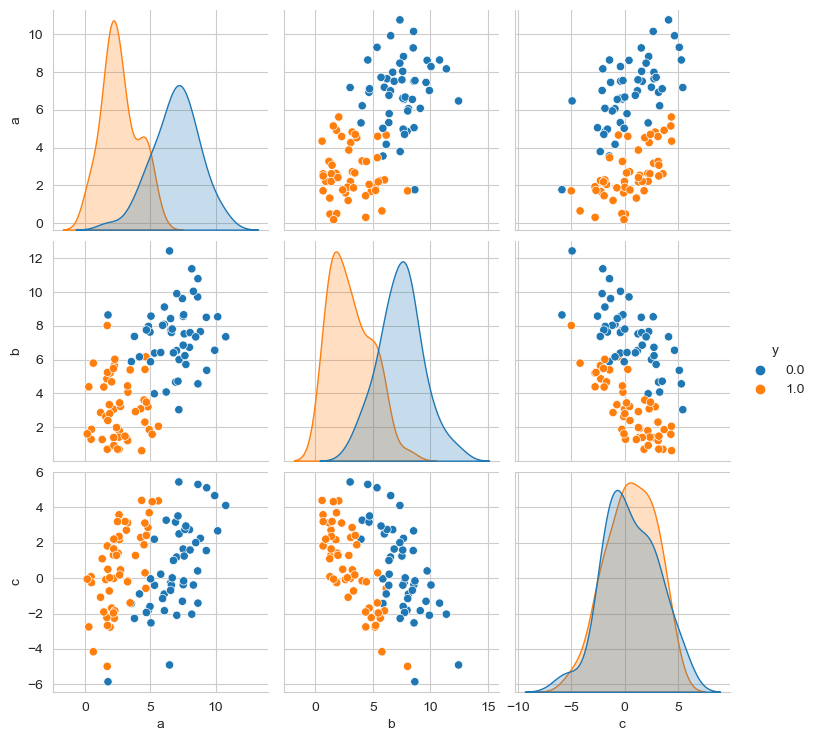

In [25]:
sns.pairplot(train, hue='y', diag_kind='kde');

In [26]:
columns = ['a', 'b', 'c']
y = pd.Categorical(train.y).codes
st_scaler = preprocessing.StandardScaler()
x_transform = st_scaler.fit_transform(train[columns])

In [27]:
with pm.Model() as model_3:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.StudentT('β', mu=0, sigma=2, nu=70, shape=len(columns))
    μ = α + pm.math.dot(x_transform, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))

    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_transform[:,0])

    yl = pm.Bernoulli('y', p=θ, observed=y)

    trace_3 = pm.sample(3000, chains = 4, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 17 seconds.


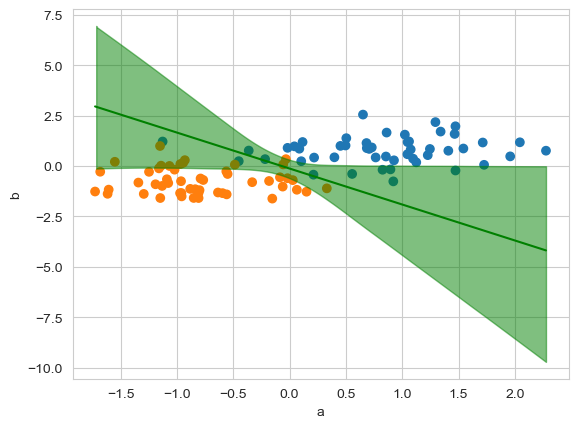

In [28]:
idx = np.argsort(x_transform[:,0])
bd = trace_3.posterior['bd'].mean(("chain", "draw"))[idx]

plt.scatter(x_transform[:,0], x_transform[:,1], c=[f'C{i}' for i in y])

plt.plot(x_transform[:,0][idx], bd, color='green');
az.plot_hdi(x_transform[:,0], trace_3.posterior['bd'], color='green')

plt.xlabel(columns[0]);
plt.ylabel(columns[1]);
# что-то пошло не так)

In [29]:
N

NameError: name 'N' is not defined